# Problem 1 (Practice)

In the lectures, we learned about the forward-time centered-space (FTCS) method. Here we will actually implement this method to solve the heat diffusion equation, and compare the stationary solution to that obtained using the relaxation method.

The heat diffusion equation is
\begin{align*}
  \frac{\partial\phi(x,y,t)}{\partial t} = D \nabla^2\phi(x,y,t),
\end{align*}
where $\nabla^2 = \partial^2/\partial x^2 + \partial^2/\partial y^2$.

(a) Show, using the von Neumann stability analysis, that for two spatial dimensions, numerical stability requires
\begin{align*}
  \Delta t < \frac{\Delta r^2}{2D},
\end{align*}
where
\begin{align*}
  \frac{1}{\Delta r^2} = \frac{1}{\Delta x^2} + \frac{1}{\Delta y^2}.
\end{align*}
(15 pts)

(b) Solve the heat diffusion equation using the FTCS method for the domain $(L_x,L_y) = (1,1)$ and $D=0.2$. Choose the boundary conditions $\phi(x,L)=50$ and $\phi(x,0)=\phi(0,y)=\phi(L,y)=0$. Let $\phi=0$ at $t=0$ everywhere except $\phi(x,L)$. Choose an appropriate $\Delta t$ according the above stability condition. Instead of saving at each timestep which may require a large memory or storage space, save $\phi$ to memory every predetermined number of timesteps so that there are 200 temporal data points. Run for $T_{max}=1$. (40 pts)

In [ ]:
    # #0.96으로 timestep두고 하면 그래프 잘나옴
    # import numpy as np
    # import matplotlib.pyplot as plt

    # Lx, Ly = 1., 1.
    # Nx, Ny = 128, 128
    # dx, dy = Lx/Nx, Ly/Ny

    # D = 0.2
    # Tmax = 1
    # dr = (dx**-2 + dy**-2)**-.5
    # dt = 0.96 * dr**2/(2*D)
    # Nt = int(Tmax/dt)

    # save_every = int(Nt/200)
    # phi = np.zeros((Nx, Ny))

    # phi[:,-1] = 50
    # phi_err = [phi.copy()]


    # for tstep in range(Nt):
    #     if tstep % save_every == 0:
    #         print(f'time step {tstep}/{Nt}')
    #         phi_err.append(phi.copy())
    #     phi[1:-1,1:-1] = phi[1:-1,1:-1] + \
    #                     (phi[2:,1:-1]+
    #                     phi[:-2,1:-1]+
    #                     phi[1:-1,2:]+
    #                     phi[1:-1,:-2]-
    #                     4*phi[1:-1,1:-1])*D*dt/dx**2
import numpy as np

# Setting is given in problem
Lx, Ly = 1., 1.
Nx, Ny = 128, 128
dx, dy = Lx/Nx, Ly/Ny

D = 0.2
Tmax = 1.0
# use 0.96 as stable timestep
dr = (dx**-2 + dy**-2)**-0.5
dt = 0.96 * dr**2 / (2*D)
Nt = int(Tmax / dt)

# Save 200 frames
# 50 is boundary condition
save_every = int(Nt/200)
phi = np.zeros((Nx, Ny))
phi[:, -1] = 50.0

# Store history for animation
phi_history = [phi.copy()]

for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())
    
    phi[1:-1, 1:-1] += ((D*dt)/dx**2) * (phi[2:, 1:-1] + 
                                         phi[:-2, 1:-1] +
                                         phi[1:-1, 2:] +
                                         phi[1:-1, :-2] -
                                         4 * phi[1:-1, 1:-1])

time step 0/13653
time step 68/13653
time step 136/13653
time step 204/13653
time step 272/13653
time step 340/13653
time step 408/13653
time step 476/13653
time step 544/13653
time step 612/13653
time step 680/13653
time step 748/13653
time step 816/13653
time step 884/13653
time step 952/13653
time step 1020/13653
time step 1088/13653
time step 1156/13653
time step 1224/13653
time step 1292/13653
time step 1360/13653
time step 1428/13653
time step 1496/13653
time step 1564/13653
time step 1632/13653
time step 1700/13653
time step 1768/13653
time step 1836/13653
time step 1904/13653
time step 1972/13653
time step 2040/13653
time step 2108/13653
time step 2176/13653
time step 2244/13653
time step 2312/13653
time step 2380/13653
time step 2448/13653
time step 2516/13653
time step 2584/13653
time step 2652/13653
time step 2720/13653
time step 2788/13653
time step 2856/13653
time step 2924/13653
time step 2992/13653
time step 3060/13653
time step 3128/13653
time step 3196/13653
time step 

(c) Using the plt.imshow function, animate the result and save to a mp4 file named 'Heat_equation.mp4'. (10 pts)

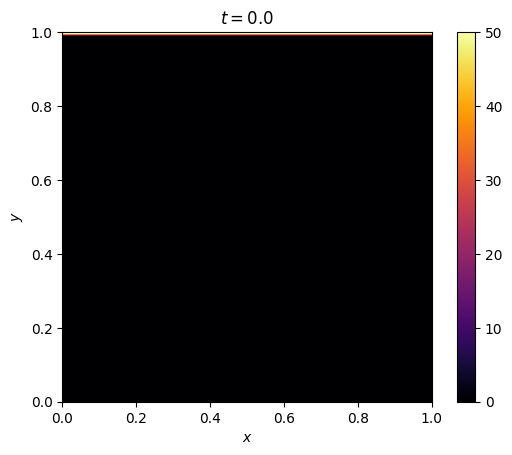

In [2]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
im = ax.imshow(
    phi_err[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='inferno'
)
ax.set_title('$t=0$')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_err[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$')

ani = FuncAnimation(fig, update, frames=len(phi_err), interval=100)
ani.save('Heat_equation.mp4', dpi=300)


(d) Try a timestep that does not satisfy the stability condition, i.e., $1.01 \Delta r^2/2D$ and save the solution to 'Heat_equation_unstable.mp4'. What happens? Typically, a grid-level noise corresponds to numerical instability. (10 pts)

time step 0/12977
time step 64/12977
time step 128/12977
time step 192/12977
time step 256/12977
time step 320/12977
time step 384/12977
time step 448/12977
time step 512/12977
time step 576/12977
time step 640/12977
time step 704/12977
time step 768/12977
time step 832/12977
time step 896/12977
time step 960/12977
time step 1024/12977
time step 1088/12977
time step 1152/12977
time step 1216/12977
time step 1280/12977
time step 1344/12977
time step 1408/12977
time step 1472/12977
time step 1536/12977
time step 1600/12977
time step 1664/12977
time step 1728/12977
time step 1792/12977
time step 1856/12977
time step 1920/12977
time step 1984/12977
time step 2048/12977
time step 2112/12977
time step 2176/12977
time step 2240/12977
time step 2304/12977
time step 2368/12977
time step 2432/12977
time step 2496/12977
time step 2560/12977
time step 2624/12977
time step 2688/12977
time step 2752/12977
time step 2816/12977
time step 2880/12977
time step 2944/12977
time step 3008/12977
time step 3

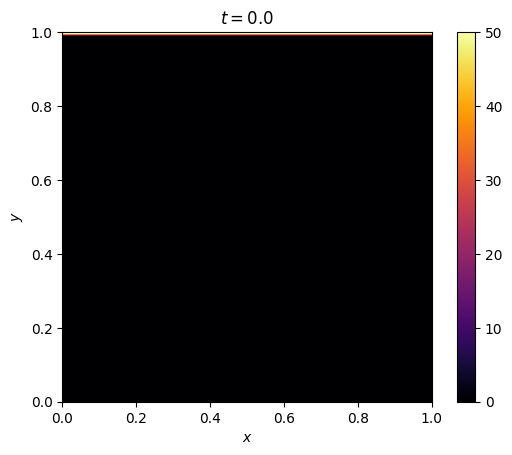

In [3]:
Lx, Ly = 1., 1.
Nx, Ny = 128, 128
dx, dy = Lx/Nx, Ly/Ny
D = 0.2
Tmax = 1
dr = (dx**-2 + dy**-2)**-.5
dt = 1.01 * dr**2/(2*D)
Nt = int(Tmax/dt)

save_every = int(Nt/200)
phi = np.zeros([Nx, Ny])

phi[:,-1] = 50
phi_err = [phi.copy()]


for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'time step {tstep}/{Nt}')
        phi_err.append(phi.copy())
    phi[1:-1,1:-1] = phi[1:-1,1:-1] + \
                    (phi[2:,1:-1]+
                     phi[:-2,1:-1]+
                     phi[1:-1,2:]+
                     phi[1:-1,:-2]-
                     4*phi[1:-1,1:-1])*D*dt/dx**2

fig, ax = plt.subplots()
im = ax.imshow(
    phi_err[0].T,
    origin='lower',
    extent=(0, Lx, 0, Ly),
    aspect='equal',
    cmap='inferno'
)
ax.set_title('$t=0$')
plt.colorbar(im, ax=ax)
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_err[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$')

ani = FuncAnimation(fig, update, frames=len(phi_err), interval=100)
ani.save('Heat_equation_unstable.mp4', dpi=300)


(e) Use the relaxation method to obtain the stationary solution to 16 digits of accuracy below the decimal point. Plot the stationary solution, the solution at the final timestep from the FTCS method, and the difference between the to on the same figure. Can you say that the FTCS solution has reached a steady state? (25 pts)

Solution converged with iteration number 100631


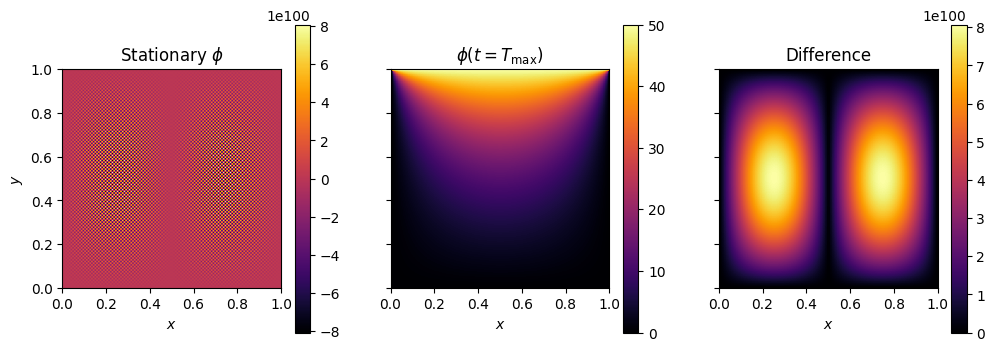

In [4]:
# Initialize values
phi = np.zeros([Nx, Ny])
phi[:, -1] = 50
phi0 = phi.copy()

N_iter = int(1e7)
eps = 1e-16

for i in range(N_iter):
    phi[1:-1,1:-1] = (
        phi0[2:,1:-1] +
        phi0[:-2,1:-1] +
        phi0[1:-1,2:] +
        phi0[1:-1,:-2]
    ) / 4
    if np.max(np.abs(phi - phi0)) < eps:
        print('Solution converged with iteration number', i+1)
        break
    elif i == N_iter-1:
        print('Max iteration reached at iteration number', N_iter)
    phi0 = phi.copy()

fig, ax = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 4))


im1 = ax[0].imshow(phi_err[-1].T, origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='inferno')
plt.colorbar(im1, ax=ax[0])
ax[0].set_title(r'Stationary $\phi$')

im2 = ax[1].imshow(phi.T, origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='inferno')
plt.colorbar(im2, ax=ax[1])
ax[1].set_title(r'$\phi(t=T_{\max})$')

im_error = ax[2].imshow(abs(phi_err[-1].T - phi.T), origin='lower', extent=[0, Lx, 0, Ly], aspect='equal', cmap='inferno')
plt.colorbar(im_error, ax=ax[2])
ax[2].set_title('Difference')

ax[0].set_ylabel('$y$')
for a in ax:
    a.set_xlabel('$x$')


---
# Problem 2

Now we are going to solve another problem, namely the wave equation given by
\begin{align*}
  \frac{\partial^2 \phi}{\partial t^2} = v^2\nabla^2\phi
\end{align*}
in two dimensions.

We will first attempt to use the FTCS method. Defining $\psi=\partial\phi/\partial t$ and applying the FTCS method in 1D gives
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t),\\
  \psi(x,t+\Delta t) &= \psi(x,t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t)+\phi(x-\Delta x,t) -2 \phi(x,t)\right].
\end{align*}

(a) Numerically solve the 2D wave equation using the FTCS method for the domain $(L_x,L_y)=(1,1)$ with $v=0.1$ for $T_{max}=20$. Discretize the grid into $(N_x,N_y)=(256,256)$ points. Choose $\Delta t=0.005$. Choose the initial condition $\phi=0$ and
\begin{align*}
  \psi(t=0) = \exp\left(-\frac{(x-L_x/2)^2+(y-L_y/2)^2}{\sigma^2}\right)
\end{align*}
with $\sigma=0.1$. Let $\phi=\psi=0$ at all boundaries.

Plot $\phi$ and save the animation file as 'Wave_equation_FTCS.mp4'. Set colorbar limits to (-0.5,0.5) by setting the vmin, vmax options in imshow. What happens eventually? (20 pts)

In [ ]:
# init setup for wave equation given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
dt = 0.005
Nt = int(Tmax/dt)
sigma = 0.1

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2) # initial condition at t=0

# simulation setting
save_every = int(Nt/200)
phi_history = []

for tstep in range(Nt):
    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())

    phi_old = phi.copy()
    psi_old = psi.copy()

    laplacian_phi = (phi_old[2:, 1:-1] + 
                     phi_old[:-2, 1:-1] +
                     phi_old[1:-1, 2:] + 
                     phi_old[1:-1, :-2] -
                     4*phi_old[1:-1, 1:-1]) / dx**2

    psi[1:-1, 1:-1] = psi_old[1:-1, 1:-1] + dt * v**2 * laplacian_phi
    phi = phi_old + dt * psi_old


# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr',
    vmin=-0.5, vmax=0.5
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_history[i].T)
    time = i * dt * save_every
    ax.set_title(f'$t={time:.2f}$ s')
    return [im]

ani = FuncAnimation(fig, update, frames=len(phi_history), interval=100)
ani.save('Wave_equation_FTCS.mp4', dpi=300)

(b) It is clear that we need to conduct a stability analysis. Discretizing the variable in space and time means that, in Fourier space, we are assuming solutions of the form
\begin{align*}
  \phi(n,m) &= \phi_0 \exp(ink\Delta x-im\omega\Delta t),\\
  \psi(n,m) &= \psi_0 \exp(ink\Delta x-im\omega\Delta t),
\end{align*}
where $m$ and $n$ are integers.

Insert these ansatz to the FTCS method and show that it yields the following linear equation
\begin{align*}
\left(\begin{array}{cc}
1-e^{-i\omega\Delta t} & \Delta t\\
-4\Delta t\frac{v^{2}}{\Delta x^{2}}\sin^{2}\left(\frac{k\Delta x}{2}\right) & 1-e^{-i\omega\Delta t}
\end{array}\right)\left(\begin{array}{c}
\phi_{0}\\
\psi_{0}
\end{array}\right)=0.
\end{align*}
(10 pts)


(c) Show that a non-trivial solution exists only if
\begin{align*}
  (1-e^{-i\omega\Delta t})^2 + 4\Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right)=0,
\end{align*}
which is the "numerical dispersion relation." For a given $k$, the solution for $\omega$ is in general complex. This means that there will be solutions that exponentially grow in time, i.e., that are numerically unstable. Thus, unfortunately, FTCS is ALWAYS unstable for the wave equation.
(5 pts)

(d) Instead, let us use the leapfrog method defined by
\begin{align*}
  \phi(x,t+\Delta t) &= \phi(x,t) + \Delta t \psi(x,t+\frac{1}{2}\Delta t),\\
  \psi(x,t+\frac{3}{2}\Delta t) &= \psi(x,t+\frac{1}{2}\Delta t) + \Delta t \frac{v^2}{\Delta x^2}\left[\phi(x+\Delta x,t+\Delta t)+\phi(x-\Delta x,t+\Delta t) -2 \phi(x,t+\Delta t)\right].
\end{align*}
By performing a similar stability analysis, show that the numerical dispersion relation is
\begin{align*}
  \sin^2\left(\frac{\omega\Delta t}{2}\right) = \Delta t^2 \frac{v^2}{\Delta x^2}\sin^2\left(\frac{k\Delta x}{2}\right).
\end{align*}
Explain why for the algorithm to be numerically stable, the condition
\begin{align*}
  \Delta t < \frac{\Delta x}{v}
\end{align*}
needs to be satisfied.

For two dimensions, it is trivial to show that the condition is $\Delta t < \Delta r/ v$ where $\Delta r$ is defined in Problem 1. (10 pts)


(e) Numerically solve the same wave equation system using the leapfrog method by choosing a timestep that satisfies the stability condition, e.g., $\Delta t = 0.95 \Delta r /v$. (20pts)

In [ ]:
# setting given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
sigma = 0.1

dr = (dx**-2 + dy**-2)**-0.5
dt = 0.95 * dr / v
Nt = int(Tmax/dt)

# initial conditions of x and y
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2)

# initial leapfrog half-step setting
laplacian_phi_t0 = (phi[2:, 1:-1] + 
                    phi[:-2, 1:-1] +
                    phi[1:-1, 2:] + 
                    phi[1:-1, :-2] -
                    4*phi[1:-1, 1:-1]) / dx**2
psi[1:-1, 1:-1] += (dt / 2.0) * v**2 * laplacian_phi_t0

# simulation setting
save_every = int(Nt / 200)
phi_history = [phi.copy()]

for tstep in range(Nt):
    phi[1:-1, 1:-1] += dt * psi[1:-1, 1:-1]

    laplacian_phi_tp1 = (phi[2:, 1:-1] + 
                         phi[:-2, 1:-1] +
                         phi[1:-1, 2:] + 
                         phi[1:-1, :-2] -
                         4*phi[1:-1, 1:-1]) / dx**2
    psi[1:-1, 1:-1] += dt * v**2 * laplacian_phi_tp1

    if tstep % save_every == 0:
        print(f'Time step {tstep}/{Nt}')
        phi_history.append(phi.copy())

# animation setup
fig, ax = plt.subplots()
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr',
    vmin=-0.5, vmax=0.5
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update(i):
    im.set_data(phi_history[i].T)
    ax.set_title(f'$t={(i*dt*save_every):.1f}$ s')

ani = FuncAnimation(fig, update, frames=len(phi_history), interval=50)
ani.save('Wave_equation_Leapfrog_stable.mp4', dpi=150)

(f) Set $\Delta t=1.01\Delta r /v$ and rerun the simulation, and save the file as 'Wave_equation_Leapfrog_unstable.mp4'. What do you expect and what happens? (10pts)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# setting given in problem
Lx, Ly = 1., 1.
Nx, Ny = 256, 256
dx, dy = Lx/Nx, Ly/Ny

v = 0.1
Tmax = 20.
sigma = 0.1

# --- Unstable Time Step ---
dr = (dx**-2 + dy**-2)**-0.5
dt = 1.01 * dr / v  # Violate CFL condition by 1%
Nt = int(Tmax / dt)
print(f"Using unstable dt = {dt:.5f}")

# --- Initial Conditions ---
x = np.linspace(0, Lx, Nx, endpoint=False)
y = np.linspace(0, Ly, Ny, endpoint=False)
X, Y = np.meshgrid(x, y)

phi = np.zeros((Nx, Ny))
psi = np.exp(-((X - Lx/2)**2 + (Y - Ly/2)**2) / sigma**2)

# --- Leapfrog: Initial half-step ---
laplacian_phi_t0 = (phi[2:, 1:-1] + phi[:-2, 1:-1] +
                    phi[1:-1, 2:] + phi[1:-1, :-2] -
                    4*phi[1:-1, 1:-1]) / dx**2
psi[1:-1, 1:-1] += (dt / 2.0) * v**2 * laplacian_phi_t0

# --- Simulation ---
save_every = int(Nt / 200)
phi_history = [phi.copy()]
print("Starting unstable leapfrog simulation...")

for tstep in range(Nt):
    phi[1:-1, 1:-1] += dt * psi[1:-1, 1:-1]
    laplacian_phi_tp1 = (phi[2:, 1:-1] + phi[:-2, 1:-1] +
                         phi[1:-1, 2:] + phi[1:-1, :-2] -
                         4*phi[1:-1, 1:-1]) / dx**2
    psi[1:-1, 1:-1] += dt * v**2 * laplacian_phi_tp1

    if (tstep + 1) % save_every == 0:
        print(f'Time step {tstep+1}/{Nt}')
        phi_history.append(phi.copy())

# --- Animation ---
fig, ax = plt.subplots(figsize=(7,6))
im = ax.imshow(
    phi_history[0].T,
    origin='lower',
    extent=[0, Lx, 0, Ly],
    aspect='equal',
    cmap='bwr'
)
ax.set_title('$t=0.0$ s')
plt.colorbar(im, ax=ax, label=r'$\phi(x,y,t)$')
ax.set_xlabel('$x$'), ax.set_ylabel('$y$')

def update_unstable(i):
    data = phi_history[i].T
    im.set_data(data)
    # Dynamically adjust color limits to show instability
    if np.all(np.isfinite(data)) and np.max(data) > 0:
        vmax = np.max(np.abs(data))
        im.set_clim(vmin=-vmax, vmax=vmax)
    time = i * dt * save_every
    ax.set_title(f'$t={time:.2f}$ s')

ani = FuncAnimation(fig, update_unstable, frames=len(phi_history), interval=50)
ani.save('Wave_equation_Leapfrog_unstable.mp4', dpi=150)
plt.close(fig)
print("\nAnimation 'Wave_equation_Leapfrog_unstable.mp4' saved.")

(g) Let us now try changing the boundary conditions. A common boundary condition is what is called a "periodic boundary condition," which means the value at the left boundary is equal to the rightmost value, etc, so that the domain repeats itself in all directions. In other words,
\begin{align*}
  \phi(0,y) &= \phi(L-\Delta x,y),\\
  \phi(L,y) &= \phi(\Delta x,y),\\
  \phi(x,0) &= \phi(x,L-\Delta y),\\
  \phi(x,L) &= \phi(x,\Delta y).
\end{align*}
Implement the periodic boundary condition for the wave equation using the leapfrog method, and this time plot the result in 3D using the plt.plot_surface function and save the result as 'Wave_equation_Leapfrog_periodic_3D.mp4'. Briefly describe in words what is happening and the difference from the previous boundary case. (25 pts)